In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read imageset and label set from .npy files
###images are saves as 2d array
#####level4->[0][0-99] level3->[1][0-99]
###labels are saved as 1d array


[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


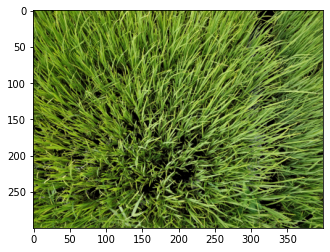

In [ ]:
labels = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/labeldata.npy")
print(labels)
images = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy")
plt.imshow(images[1][99])
plt.show()

#creating a dataframe of matrix and label

In [ ]:
cols = ['matrix', 'lavel']
lst = []
for a in range(150):
    lst.append([images[0][a],4])
df1 = pd.DataFrame(lst, columns=cols)

for a in range(150):
    lst.append([images[1][a],3])
df1 = pd.DataFrame(lst, columns=cols)
df1

,matrix,lavel
0,"[[[0.07450981, 0.16862746, 0.023529412], [0.09...",4
1,"[[[0.06666667, 0.1254902, 0.011764706], [0.086...",4
2,"[[[0.50980395, 0.6666667, 0.19215687], [0.4588...",4
3,"[[[0.5058824, 0.6431373, 0.07058824], [0.18823...",4
4,"[[[0.2784314, 0.4745098, 0.07058824], [0.34901...",4
...,...,...
295,"[[[0.20784314, 0.43137255, 0.05882353], [0.160...",3
296,"[[[0.08235294, 0.15294118, 0.02745098], [0.349...",3
297,"[[[0.7647059, 0.84705883, 0.39607844], [0.3882...",3
298,"[[[0.15686275, 0.27450982, 0.019607844], [0.41...",3


In [ ]:
X=df1['matrix']
Y=df1['lavel']

In [ ]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train) #need scalar to fit

#another way : considering each matrix as a vector 

In [ ]:
df2=pd.DataFrame(data=images[0].reshape(300,-1))  # 1st row as the column names
X=df2[0:]
a=np.full(shape=150, fill_value=4,dtype=np.int)
b=np.full(shape=150, fill_value=3,dtype=np.int)
Y=np.concatenate([a,b])

In [ ]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train) #need scalar to fit

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted=clf.predict(X_test)

60

In [ ]:
len=y_test.size;
count=0;
for i in range (len):
  if(y_test[i]==predicted[i]):
    count+=1
accuracy=count/len;
print("Accuracy on test set: ",accuracy*100,"%")

Accuracy on test set:  73.33333333333333 %
